In [91]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
#import pandas as pd 
import os
#from skimage.data import page
#from skimage.filters import (threshold_otsu, threshold_niblack,
#                             threshold_sauvola)
#import mahotas
#import scipy.signal



In [92]:

#this is used to get the most points locations to support manual calculations of informations such as card height and size or character height
#once the calculation is done this code can be commented out
       
'''
def mousePoints(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)
'''        

'\ndef mousePoints(event, x, y, flags, params):\n    if event == cv2.EVENT_LBUTTONDOWN:\n        print(x,y)\n'

In [93]:
    
#def do_nothing(x):
#    pass

# Functions:

### Binarization function:

In [94]:
# this function does the the adoptive mean thresholding to create a binary image
# this is not automatic will need to change if resolution chenges

def adaptive_thresholding(use_blur=False, mean=True, blockSize=11, C=5):
    if mean:
        
        if use_blur == False:  # this is most used case
            mean_img = cv2.adaptiveThreshold(image_grey_scale,
                                              255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY, blockSize, C)

            return mean_img

        else:  # this is the second most used case
            mean_blurred_img = cv2.adaptiveThreshold(blurred,
                                            255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY, blockSize, C)

            return mean_blurred_img

    else:
        
        if use_blur:
            blurred_img = cv2.adaptiveThreshold(blurred,
                                              255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, blockSize, C)
            return blurred_img

        else:
            img_without_blur_and_mean = cv2.adaptiveThreshold(image_grey_scale,
                                            255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, blockSize, C)
            return img_without_blur_and_mean 


### Function to add the last number:

In [95]:
def add_last_number(output_vertical):
    # the input is the vertical histogram
    input_image = output_vertical.copy()        
    N2 = len(blpx_in_each_col) - 1
    
    # 2.1.getting the nmber of pixels of the part of the last character

    F2 =[] 
    for i in range(N2, 0, -1):
        if blpx_in_each_col[i] != 0 :
            F2.append(blpx_in_each_col[i])
            if blpx_in_each_col[i-2] == 0:
                break
    # 3.1.value c getting the white space at left until the first character:
    Temp01 = 0
    for i in range(len(blpx_in_each_col)-1): # we check if the px is superior than 3, if it is we take it coordinate(index).
        if blpx_in_each_col[i+2] > 3:
            Temp01 = i
            break
    if Temp01 > 50 :
        Temp01 = 30
    return F2, Temp01

### Plot function:

In [96]:
# this function is to plot single output or image
def Plot(Input, size, Title, extent, grey_scale_plot = True, plot_actual_location_in_card = True):
    
    fig, ax = plt.subplots(figsize=(size,size))  
    plt.title(Title)
    if grey_scale_plot == True:
        if plot_actual_location_in_card == True:
            ax.imshow(Input,'gray', extent = extent)
        else:
            ax.imshow(Input,'gray')
    else:
        if plot_actual_location_in_card ==True:
            ax.imshow(Input, extent = extent) 
        else:
            ax.imshow(Input)
        
    plt.show()

# Multiplots is a function to plot multiple images in one figure
def MultiPlots(Input,  rows, cols, size, Extent, Titles, plot_actual_location_in_card = True):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(size, size))
    if plot_actual_location_in_card == True :    
        for axis, i, k, e in zip (ax.flatten(), Input, Titles, Extent):
            axis.set(title = k ) 
            axis.imshow(i,'gray', extent = e)
    else:   
        for axis, i, k in zip (ax.flatten(), Input, Titles):
            axis.set(title = k ) 
            axis.imshow(i,'gray')
    
    fig.savefig('C:/Users/Soheib/Desktop/Task7/'+titles1[number_of_id_cards]+'.png')
    
    

### counting of black pixels and plot of histograms:

In [97]:
# count_of_blpx is a function to black pixels number in each row or column:
def count_of_blpx(image, L, COL = True):
    if COL == True: #black pixels in each column
        for y in range(np.asarray(image).shape[1]):         #height       
            Temp02=0
            for x in range(np.asarray(image).shape[0]):     #width
                if np.asarray(image)[x,y] == 0:
                    Temp02 = Temp02 + 1     #counting no. of black pixels in each row
                
            L.append(Temp02)  
    else: #black pixels in each row
        for y in range(np.asarray(image ).shape[0]):         #height       
            Temp03 = 0
            for x in range(np.asarray(image).shape[1]):     #width
                if image[y,x] == 0:
                    Temp03 = Temp03 + 1     #counting no. of black pixels in each row
                
            L.append(Temp03)  



In [98]:
# Hist is a function to plot the histograms using the blpx_in_each_col list:
def Hist(Input, blpx, vertical = True):
    if vertical == True: # to plot vertical histogram: vertical histogram is a vertical line mouving away the x axis
        height = np.asarray(Input).shape[0]
        width = np.max(blpx)    
        for col in range(np.asarray(Input).shape[1]):       #for each row in input image draw a white line
            row = int(blpx[col])
            cv2.line(Input, (col,0), (col,height-row), (255,255,255), 1)   #this command is for ploting the histograms
            
            
    else:   #to plot horizental hist using blx_in_each_row list: horizontal histogram is a horizontal line mouving away the y axis
        height = np.asarray(Input).shape[0]
        width = np.asarray(Input).shape[1] 
        for row in range(np.asarray(Input).shape[0]):       #for each row in input image draw a white line
            col = int(blpx[row])
            cv2.line(Input, (255,row), (col,row), (255,255,255), 1) #this command is for ploting the histograms
    return Input

### marking key words function:

In [99]:
# Mark is function to mark key words:
def Mark(Input):
    #1.1 getting the rectangle points:
    pt_x_for_sex = int(0.366 * Input.shape[1]) # x coordinates of the center of the marked rectangle
    pt_y_for_sex = int(0.86 * Input.shape[0]) # y coordinates of the center of the marked rectangle
    pt_x_for_RH = int(0.6 * Input.shape[1]) # x coordinates of the center of the marked rectangle
    pt_y_for_RH = int(0.861 * Input.shape[0]) # y coordinates of the center of the marked rectangle
    # marking the word:
    Input[pt_y_for_sex - 10 : pt_y_for_sex + 10, pt_x_for_sex - 10 : pt_x_for_sex + 10] = [255, 0, 0]
    Input[pt_y_for_RH - 10 : pt_y_for_RH + 10, pt_x_for_RH - 10 : pt_x_for_RH + 10] = [255, 0, 0]

### extracting first and last character:

In [100]:
# first char function is to extract the first character
# use blpx list
def first_char_function(input_image):
    
    out_first_char1 =  [] 
    # getting the horizontal intersections :
    Temp05 = 0 #temp to number_of_intersections
    K = input_image.shape[0] - 1
    #1.1.getting the ntersections:
    for x in range(input_image.shape[1]-1): #width
        if input_image[K,x+1] != input_image[K,x] : # getting the list of intersection from writgh to left
            Temp05 = Temp05 + 1 
            out_first_char1.append([K, x])
            if Temp05 == 10 :        # once we get 10 intersections we stop
                break
        out_first_char1.append(Temp05)  
    
    #1.2.removing the number of intersections:
    inter = []
    for i in range(len(out_first_char1)):
        if type(out_first_char1[i]) == list: 
            inter.append(out_first_char1[i][1])
            
    #1.3.if the difference between two intersection (E and S) is bigger than 60% of the min chat ( to avoid taking the noise as first char)
    # store them in the list inter2
    inter2 = []
    for i in range(int(len(inter)/2)):
        if inter[2*i+1]- inter[2*i] > 9: #we asume that max noise is less than 60% of the min char width which is 9 (calculated manually)  
            inter2.append(inter[2*i]) # if it's more than 60% of the min char width we assume that's the character
            inter2.append(inter[2*i+1])
            break
    
    #1.4.the width of the first character is the difference between the two intersections stored
    first_curve = inter2[1] - inter2[0]
    
    #NB: we can find a very large noise between the two first characters if it's tha case we divide the width by 2.
    if first_curve > 20:
        first_curve = 17   #17 is the max width of character

    #1.5.finally the first characte is extracting from the image of ID number    
    first_character = new_binary_img[0 : new_binary_img.shape[0], 0 : first_curve + 4  ] # I added 4px as margin error
    return first_character, first_curve

# function last char function i to extract the last character:

def last_char_function(input_image) : 
    out_last_char =  [] 
    #1.1.getting the list of intersection from wrote to left:
    n = input_image.shape[1]-1
    K = input_image.shape[0] - 1
    Temp06 = 0
    for x in range(n, 0, -1 ): #width
        if input_image[K, x] != input_image[K, x - 1] : # detecting the intersections
            Temp06 = Temp06 + 1
            out_last_char.append([K, x])      #store the coordinates of the intersections
            if Temp06 == 2 :    # once we have 2 intersections we stop
                break
        out_last_char.append(Temp06)

    #1.2.removing the number of intersections:
    inter_last = []
    for i in range(len(out_last_char)):
        if type(out_last_char[i]) == list: 
            inter_last.append(out_last_char[i][1])
    #1.3 getting width of the last curve
    last_curve = inter_last[0] - inter_last[1]

    #1.4.extracting the last character from the id number image:
    last_character = new_binary_img[0 : new_binary_img.shape[0], new_binary_img.shape[1] - last_curve - 4 : new_binary_img.shape[1]]
    return last_curve, last_character

### getting the minimums:

In [101]:
# getting the minimum of first and last character:
def get_min_first_char(input_image): 
    # our input is the horizental histogram of the character:
    
    #1.1.getting the list of intersections:
    horiz_char_first1 =  [] 
    horiz_char_first=[]
    for y in range(input_image.shape[0]-1): 
        if input_image[y,1] != input_image[y+1,1] :
            horiz_char_first1.append([y, 1])
            if blpx_in_each_row[0] != 0:  
                horiz_char_first = horiz_char_first1[1 : len(horiz_char_first1)]
            else :
                horiz_char_first = horiz_char_first1[0 : len(horiz_char_first1)]
    #1.2.removing the noise because a noise can not be higher than 60% of the min hight of the character
    final_horiz_first=[]
    for i in range(int(len(horiz_char_first)/2)  ):
        if horiz_char_first[2*i+1][0] - horiz_char_first[2*i][0] > 15:
            final_horiz_first.append(horiz_char_first[2*i][0])
            final_horiz_first.append(horiz_char_first[2*i+1][0])
    
    #1.2.returning the min of the first character
    return( min(final_horiz_first), max(final_horiz_first))


def get_min_last_char(input_image):
    horiz_char_last1 =  []
    horiz_char_last =  []    
    #1.1.getting the list of intersections:
    for y in range(input_image.shape[0]-1): #width
        if input_image[y,1] != input_image[y+1,1] :
            horiz_char_last1.append([y, 1])
            if blpx_in_each_row[0] != 0:
                horiz_char_last = horiz_char_last1[1 : len(horiz_char_last1)]
            else :
                horiz_char_last = horiz_char_last1[0 : len(horiz_char_last1)]
                
    #1.2.removing the noise because a noise can not be higher than 15px
    final_horiz_last=[]
    for i in range(int(len(horiz_char_last)/2)):
        if horiz_char_last[2*i+1][0] - horiz_char_last[2*i][0] > 15:
            final_horiz_last.append(horiz_char_last[2*i][0])
            final_horiz_last.append(horiz_char_last[2*i+1][0])
    #1.2.returning the min of the first character
    return ( min(final_horiz_last), max(final_horiz_last))

In [201]:
outpath1 = 'testt/'

titles1 =  [  'id1', 'id2', 'id3', 'id4', 'id5', 
                'id6', ' id7', 'id8','id9', 'id10', 
                ' id11', ' id12', 'id13', 'id14', 'id15',
                'id16', ' id17', 'id18','id19', 'id20',
               'id21', ' id22', 'id23','id24', 'id25']

# The main code:

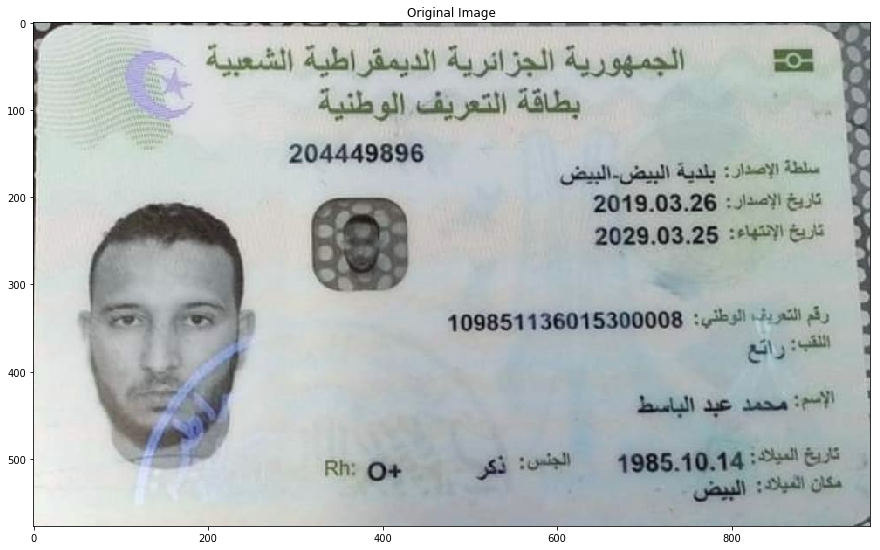

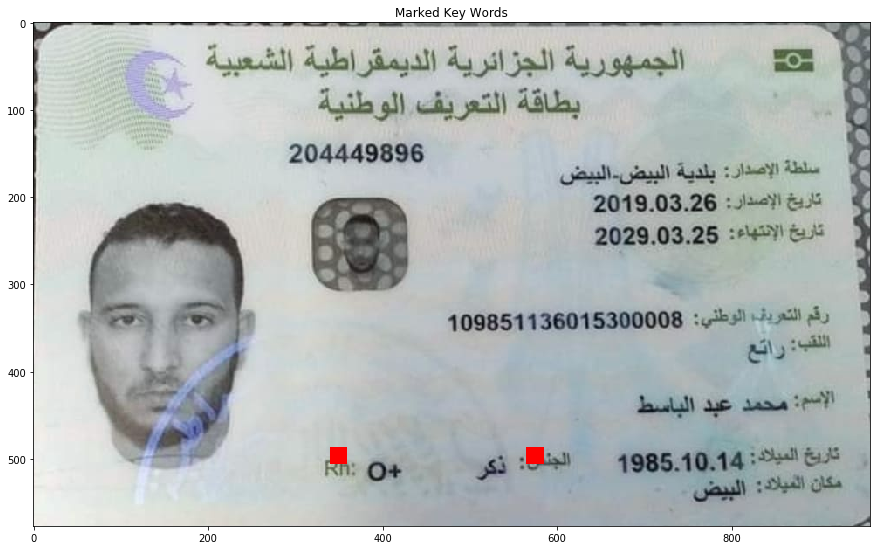

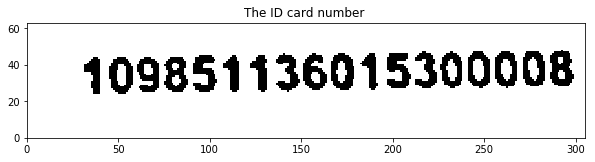

first and last # 0 0


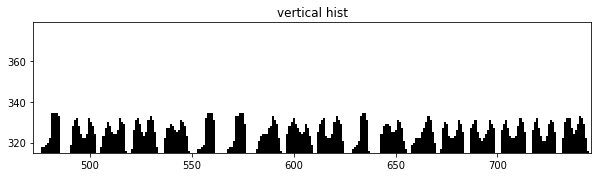

llllllllllllllllllllllllllllllll 13


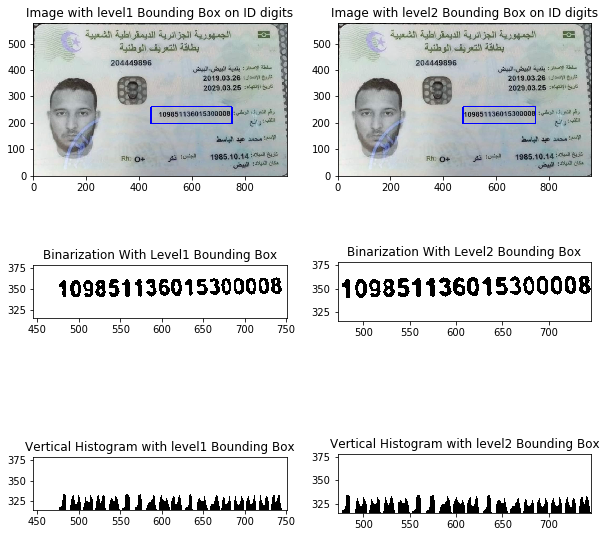

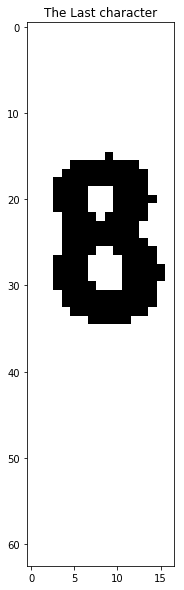

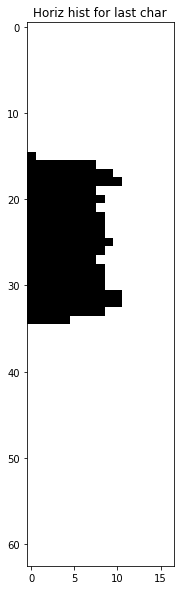

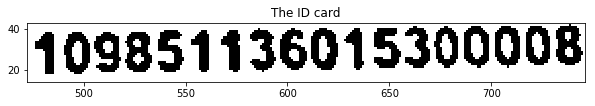

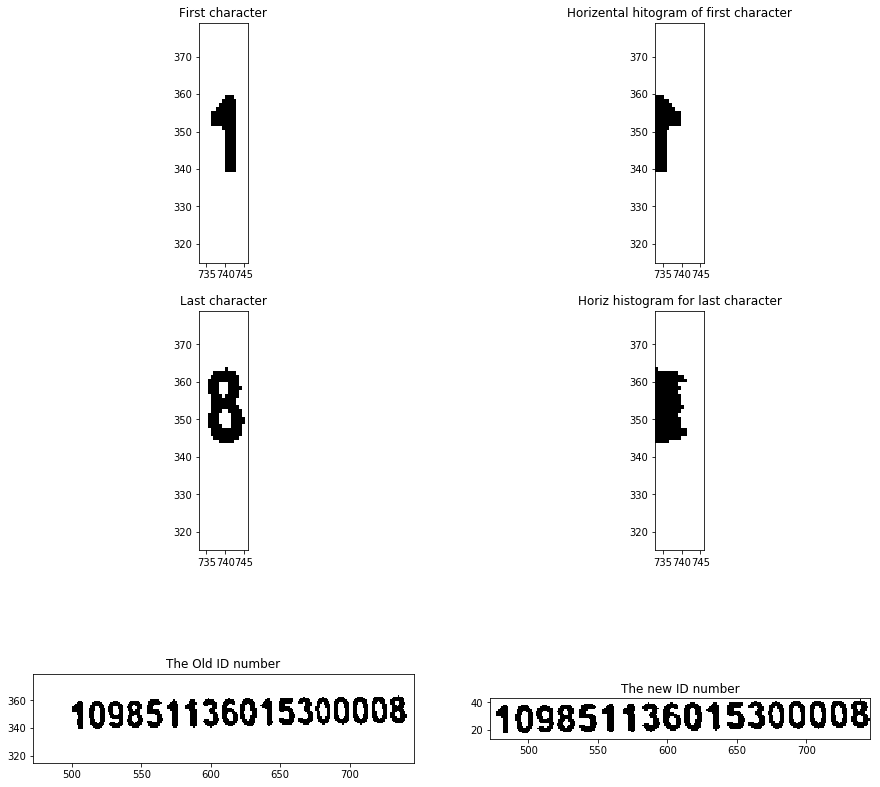

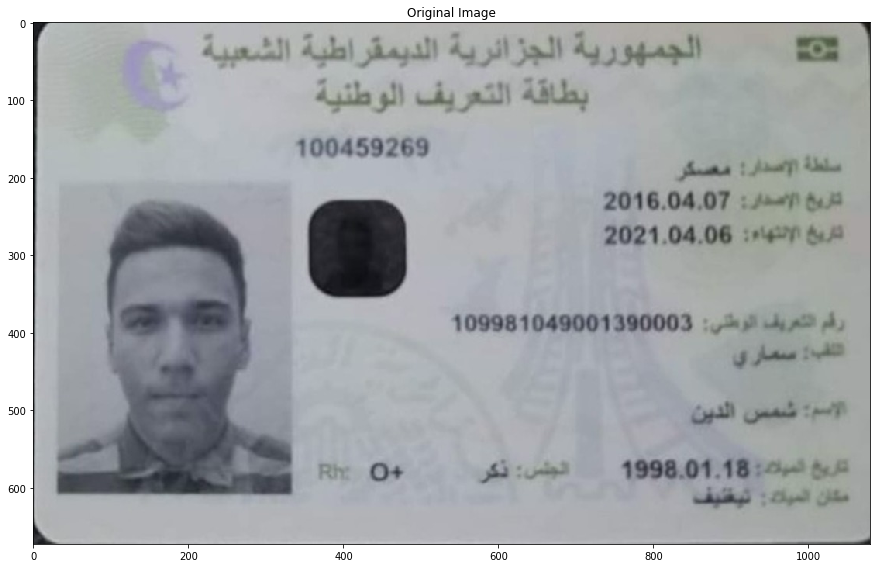

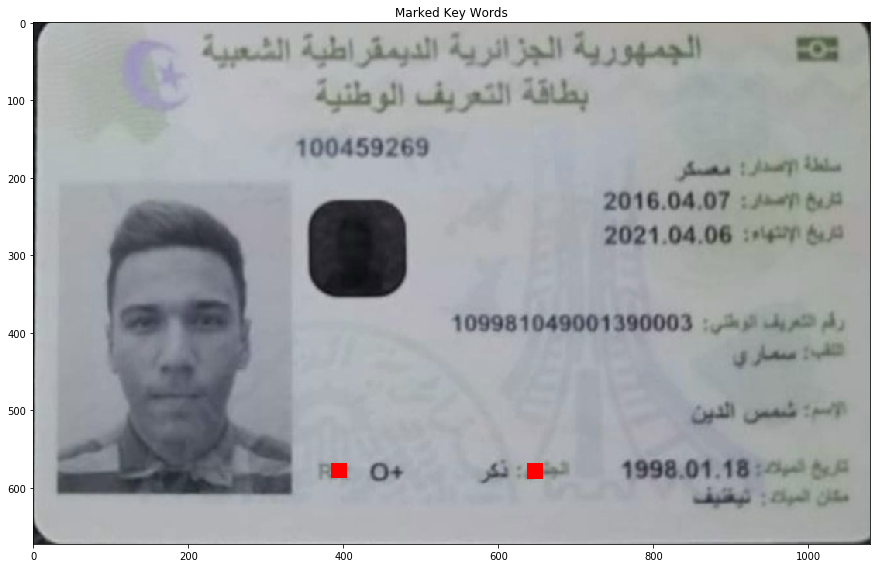

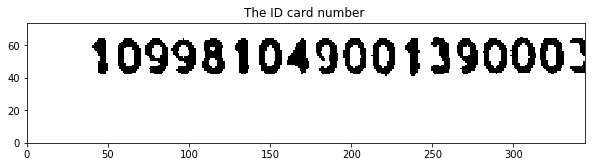

first and last # 0 0


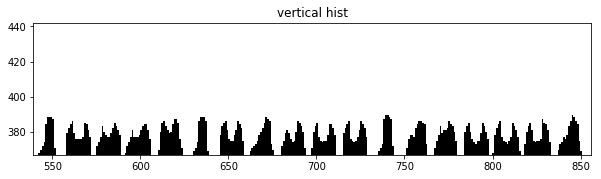

llllllllllllllllllllllllllllllll 10


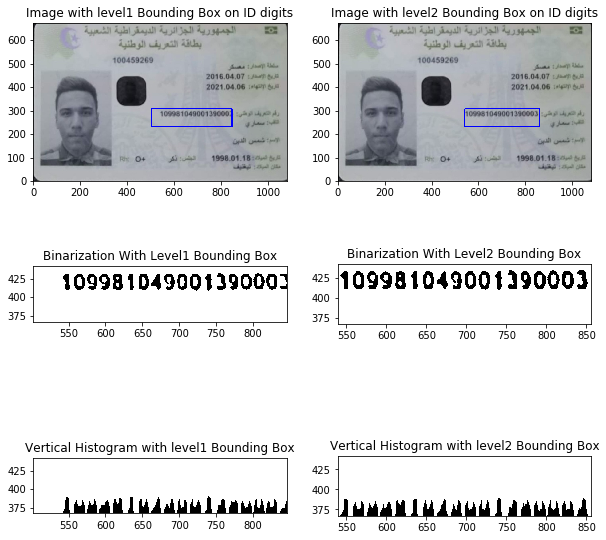

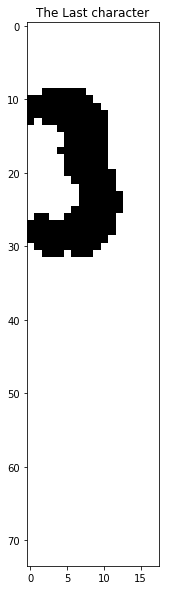

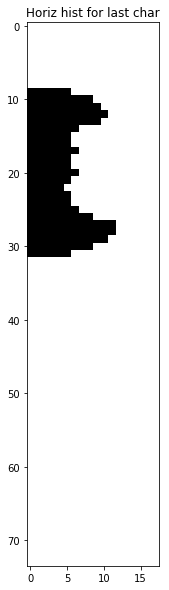

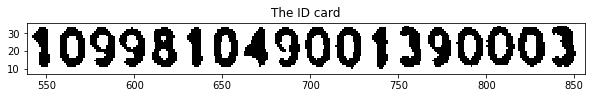

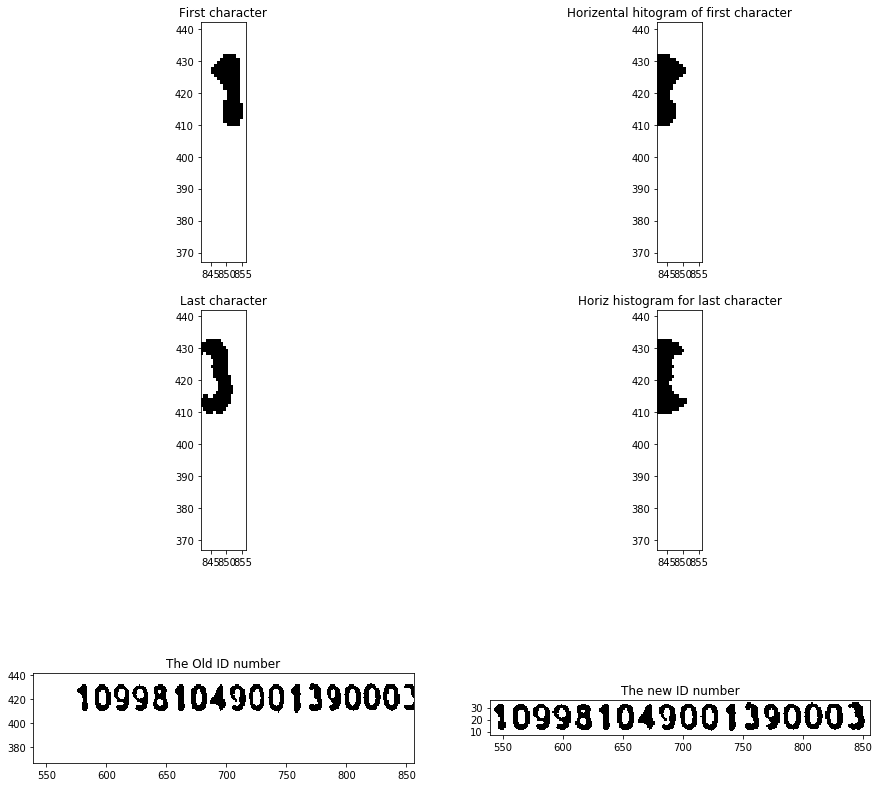

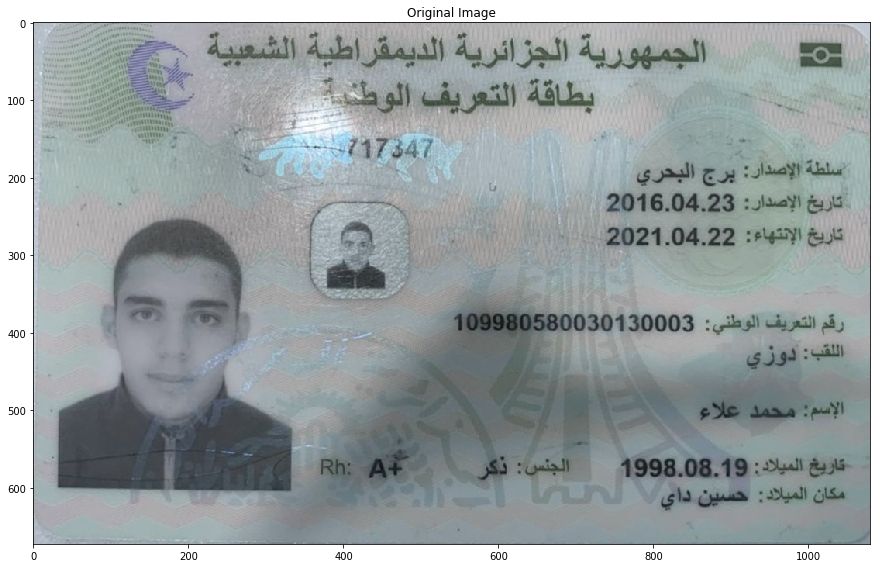

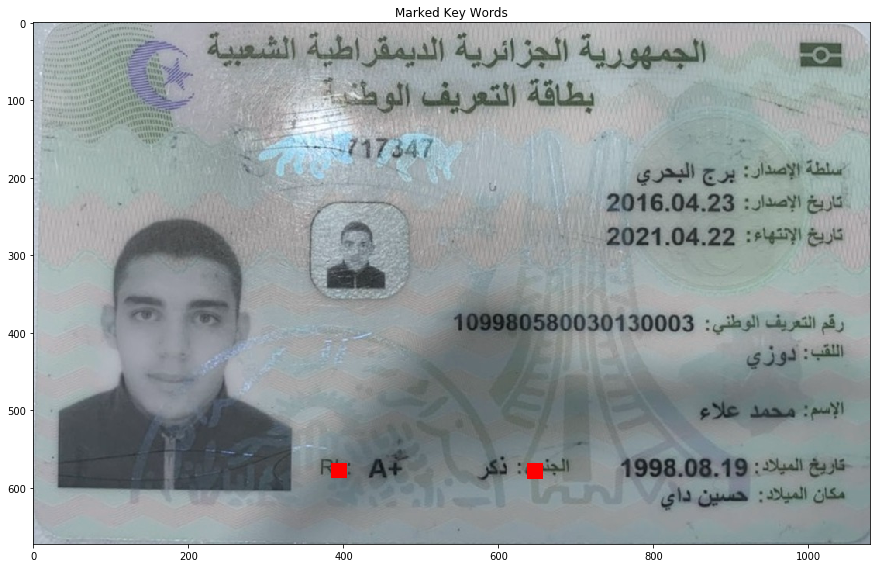

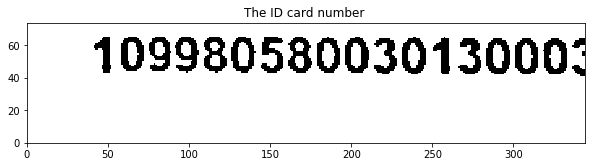

first and last # 0 0


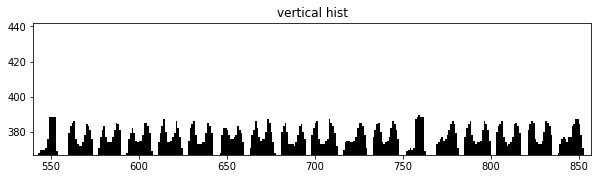

llllllllllllllllllllllllllllllll 11


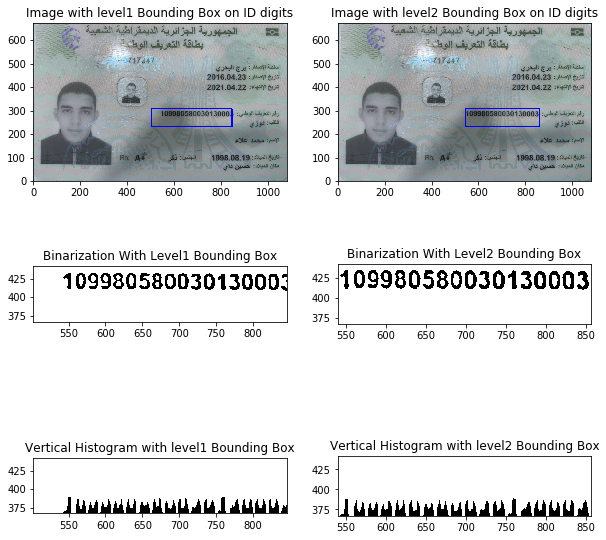

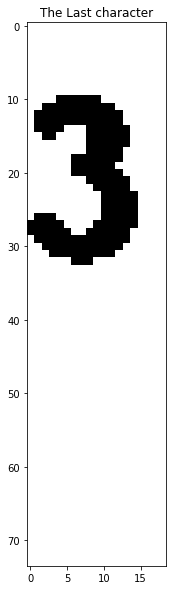

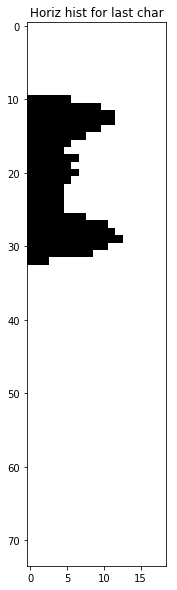

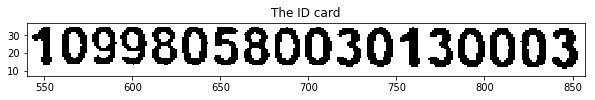

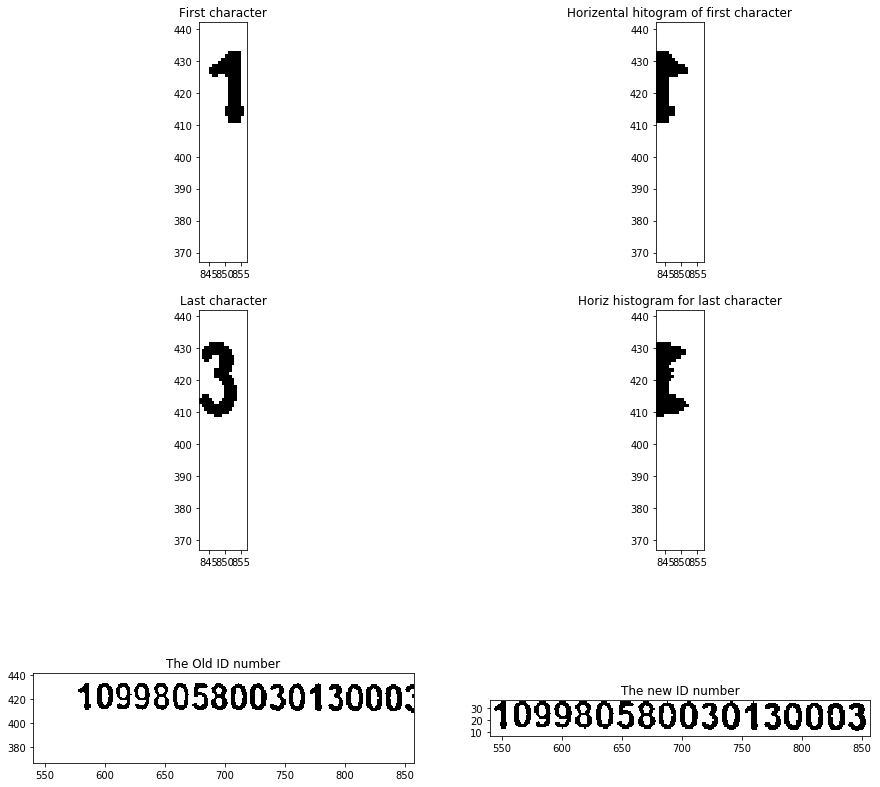

In [212]:
number_of_id_cards = 0   # to get the number of id cards #num
#SO = []


for img in os.listdir(outpath1): #im1 to img
    
    # the percentage: put the meaning of each one 
    alpha = 0.465   # the percentage of x value of the first point of the bounding box
    beta = 0.5468   #the percentage of y value of the first point of the bounding box
    gamma = 0.784   # the percentage of x value of the second point of the bounding box 
    lamda = 0.6574  #the percentage of y value of the second point of the bounding box
    
    original_image = cv2.imread(outpath1 + img)   # uploading the images
    
    Plot(original_image, 15, 'Original Image', [] ,  grey_scale_plot = True , plot_actual_location_in_card = False) # plot of the original image
    
    width, height = int((gamma - alpha)*original_image.shape[1]), int((lamda - beta)*original_image.shape[0])           #fixing the height and the width of the image
    
    number_of_id_cards = number_of_id_cards + 1 # t get the number of id cards
    
    # the coordinates of key words:

    # for selecting the key words :
    #we multiple the ourcentage by the shaes of riginal image to get the coordinates
    a = int(alpha * original_image.shape[1]) 
    b = int(beta * original_image.shape[0])
    c = int(gamma * original_image.shape[1])
    d = int(lamda * original_image.shape[0])

    extent2 = [a, c, b, d] # axis put x and y cordinates of the 
    
    #first point to trace the rectangle for ID number :
    pts1 = np.float32([[a, b], [c, b], [a, d], [c, d]]) # top left 
    #second point to trace the rectangle for ID number:
    pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]]) #buto right #bts2
    
    #extracting the  rectangle:
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    image_of_ID_num = cv2.warpPerspective(original_image, matrix, (width, height)) #img of bd of id number
    
    
    #identifying markers of key words:
    marked_image = original_image.copy()
    Mark(marked_image)
    Plot(marked_image, 15, 'Marked Key Words', [] ,grey_scale_plot = False ,plot_actual_location_in_card = False)
    
    # Plot of the image with rectangles :
    image_with_bb = original_image.copy()  # image with bb
    color = (0,0,255)
    cv2.rectangle(image_with_bb, (a, b), (c, d), color,4)

    #convert the grey scale
    image_grey_scale = cv2.cvtColor(image_of_ID_num, cv2.cv2.COLOR_BGR2GRAY) 
    
    # deleting noise : 
    # dilation :
    kernel = np.ones((5,5), np.uint8) 
    img_dilation = cv2.dilate(image_grey_scale, kernel, iterations=1)
    #bilateral filter ( it is manual ):
    blurred = cv2.bilateralFilter(img_dilation, 10, 31, 31)
    #adabtive mean thresholding(it is manual):
    binary_img = adaptive_thresholding(mean=True,
                                            use_blur=False, blockSize =21, C=15) #binary_image

    extent1 = [0, width, 0, height] # axis of the ID number
    Plot(binary_img, 10, 'The ID card number ', extent1,  grey_scale_plot = True , plot_actual_location_in_card = True)

    
    # vertical histogram:
    blpx_in_each_col = []
    count_of_blpx(binary_img ,blpx_in_each_col, True)
    vert_hist = np.zeros([np.asarray(binary_img).shape[0],np.asarray(binary_img).shape[1]])  #img_vertical_hist
    Hist(vert_hist, blpx_in_each_col, True)
    
    
    F2, white_px_left =  add_last_number(vert_hist) # the white space in left and the part of the last character
    


    white_px_right = 0
    N = len(blpx_in_each_col) - 1

    Part_of_last_char = len(F2)
    MaxOfWidth = 16
        
    if blpx_in_each_col[N] != 0 :
        gamma = gamma + ( (MaxOfWidth - Part_of_last_char + 2 ) / original_image.shape[1])  #in case we have a part of the last character; we add max width minus the length of the last character that is present plus 2 ( 2 is margin error)
    
    for i in range(N, 0, -1):  
        if blpx_in_each_col[i] == 0 and blpx_in_each_col[N] == 0:   #if  the last pixel is white and the current pixel i is 0 we count the number of pixels until the next pixel is black
            if blpx_in_each_col[i-2] != 0:
                white_px_right = N + 1 - i
                break

    #SO.append(white_px_left)
    gamma = gamma - (white_px_right / original_image.shape[1])    #removing the white px in the right side
    alpha = alpha + ((white_px_left - 2) / original_image.shape[1]) #removing the white px in the left side
    width, height =  int((gamma - alpha)*original_image.shape[1]), int((lamda - beta)*original_image.shape[0]) #fixing the height and the width of the image
    
    # the coordinates of new key words:

    # new coordinates for the bounding fox for id number:
    a = int(alpha * original_image.shape[1]) 
    b = int(beta * original_image.shape[0])
    c = int(gamma * original_image.shape[1])
    d = int(lamda * original_image.shape[0])
    
    #first point to trace the rectangle for RH ans sex :
    pts1 = np.float32([[a, b], [c, b], [a, d], [c, d]])
    #second point to trace the rectangle for RH and sex:
    pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    
    #extracting the two rectangles:
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    #matrix2 = cv2.getPerspectiveTransform(pts2, pts)
    image_of_Sex = cv2.warpPerspective(original_image, matrix, (width, height)) 

    image_with_new_bb = original_image.copy()
    color = (0,0,255)
    cv2.rectangle(image_with_new_bb, (a, b), (c, d), color,4)    

    #grey scale
    image_grey_scale = cv2.cvtColor(image_of_Sex, cv2.cv2.COLOR_BGR2GRAY)
    
    # deleting noise : 
    
    # dilation :
    kernel = np.ones((5,5), np.uint8) 
    img_dilation = cv2.dilate(image_grey_scale, kernel, iterations=1)
    #bilateral filter :
    blurred = cv2.bilateralFilter(img_dilation, 10, 31, 31)
    #adabtive mean thresholding:
    new_binary_img = adaptive_thresholding(mean=True,
                                            use_blur=False, blockSize =21, C=15)
    extent3 = [a, c, b, d]
    #Plot(threshold_image2, 10, 'The ID number after mouving left and wright white', extent2,  k = True , k2 = True)

    blpx_in_each_col2 = []
    count_of_blpx(new_binary_img, blpx_in_each_col2, True)
    new_vert_hist = np.zeros([np.asarray(new_binary_img).shape[0],np.asarray(new_binary_img).shape[1]]) 
    print('first and last #',blpx_in_each_col2[0], blpx_in_each_col2[-1])
    Hist(new_vert_hist, blpx_in_each_col2, True)
    Plot(new_vert_hist , 10, 'vertical hist', extent3,  grey_scale_plot = True , plot_actual_location_in_card = True)
    
    
    # print of the first ID nmber and after deleting white px 
    titles4 =  ['Image with level1 Bounding Box on ID digits','Image with level2 Bounding Box on ID digits','Binarization With Level1 Bounding Box','Binarization With Level2 Bounding Box', 'Vertical Histogram with level1 Bounding Box', 'Vertical Histogram with level2 Bounding Box']
    images_first_and_last_bb = [image_with_bb, image_with_new_bb, binary_img, new_binary_img, vert_hist, new_vert_hist]
    orig = [0, original_image.shape[1], 0, original_image.shape[0]]
    E = [orig, orig, extent2, extent3, extent2, extent3]        
    MultiPlots(images_first_and_last_bb, 3, 2, 10,  E, titles4)

    #getting the max height of the character:
    Maxofheights = max(blpx_in_each_col) / original_image.shape[0]
    if Maxofheights > 0.04:
        Maxofheights = 0.038
        
    
    input_image = new_vert_hist.copy()
    first_curve = 0
    first_character, first_curve = first_char_function(input_image) #first char of id number
    print('llllllllllllllllllllllllllllllll',first_curve)
    extent_FC = [a, a + first_curve + 4 , b, d ]
    #Plot(first_character, 10, 'The First character', extent_FC,  k = True , k2 = True)
    
    # horizental histogram :
    blpx_in_each_row = []
    count_of_blpx(first_character, blpx_in_each_row, False)
    horiz_hist_of_first_char = np.zeros([np.asarray(first_character).shape[0],np.asarray(first_character).shape[1]]) 
    Hist(horiz_hist_of_first_char, blpx_in_each_row, False)
    #Plot(output_horizental_first, 10, 'horiz hist of First character', extent_FC,  k = True , k2 = True)
    
    #getting the minimim and maximum of first character
    input_image  = horiz_hist_of_first_char.copy()       
    Min_first, Max_first = get_min_first_char(input_image)
    #add the max
    
    input_image  = new_vert_hist.copy()
    last_curve, last_character = last_char_function(input_image)
    extent_LC = extent_FC = [c - last_curve , c , b, d ]

    Plot(last_character, 10, 'The Last character', [],  grey_scale_plot = True , plot_actual_location_in_card = False)
    
    # horizental histogram :
    blpx_in_each_row = []   
    count_of_blpx(last_character, blpx_in_each_row, False)
    horiz_hist_of_last_char = np.zeros([np.asarray(last_character).shape[0],np.asarray(last_character).shape[1]])  #initialization of the image
    Hist(horiz_hist_of_last_char, blpx_in_each_row, False)
    Plot(horiz_hist_of_last_char, 10, 'Horiz hist for last char', [],  grey_scale_plot = True , plot_actual_location_in_card = False)
    
    #getting the minimim of last character
    input_image  = horiz_hist_of_last_char.copy()
    Min_last, Max_last = get_min_last_char(input_image)
    
    #Max and Min of the minimums and maximum of the maximums
    Max = min(Min_first, Min_last)
    Min = max(Max_first, Max_last)  

    
    # Plot of the final ID card number:
    extent4 = [a, c, Max - 1 , Min + 5  ]
    # from minimum of minmums to maximum of maximums
    last_bb_of_id_num = new_binary_img[Max - 1  : Min + 5  , 0: new_binary_img.shape[1]] #lat bb of id number
    Plot(last_bb_of_id_num, 10, 'The ID card', extent4,  grey_scale_plot = True , plot_actual_location_in_card = True)

    
    Titles =  ['First character','Horizental hitogram of first character','Last character','Horiz histogram for last character','The Old ID number', 'The new ID number']
    images2 = [first_character, horiz_hist_of_first_char, last_character, horiz_hist_of_last_char, binary_img, last_bb_of_id_num]
    E2 = [extent_FC, extent_FC, extent_LC, extent_LC, extent3, extent4]
        
    MultiPlots(images2, 3, 2, 15, E2, Titles )
    #percentage.append(L)
    
    
    
    if number_of_id_cards > 2:
        
        break

 

        
    


    
    
    



    

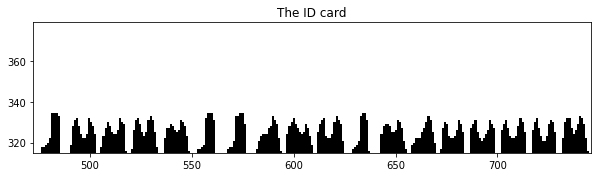

In [203]:
Plot(new_vert_hist, 10, 'The ID card', extent3,  grey_scale_plot = True , plot_actual_location_in_card = True)

In [122]:
q = []
A = []
for i in range(len(blpx_in_each_col2)-1):
    if blpx_in_each_col2[i] > 3 :
        q.append(i)
        if blpx_in_each_col2[i+1] < 3:
            q.append(i+1)
            A.append(q[0])
            A.append(q[-1])
            q = []
            
            
        

In [123]:
len(A)

22

In [213]:
A = []
input_image = new_vert_hist
n = input_image.shape[0] - 1 
for i in range((input_image.shape[1]) - 1):
    if input_image[n][i] > input_image[n][i+1]:
        A.append(i)

    

In [21]:
f = []
for i in range(int(len(A) / 2 ) ):
    f.append(last_bb_of_id_num[0 : last_bb_of_id_num.shape[0]   , A[2*i] - 1 : A[2*i+1] + 1 ])
f.append(last_character)

In [214]:
f2 = []
for i in range(int(len(A))-1 ):
    f2.append(last_bb_of_id_num[0 : last_bb_of_id_num.shape[0]   , A[i] - 1 : A[i+1] + 1 ])
f2.append(last_character)

In [35]:
char = last_bb_of_id_num[0 : last_bb_of_id_num.shape[0]   , A[0] - 1  : A[1] + 1 ]


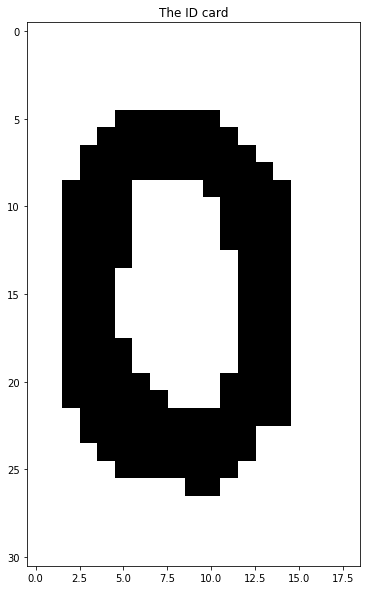

In [183]:
char = f2[15]
Plot(char, 10, 'The ID card', [],  grey_scale_plot = True , plot_actual_location_in_card = False)

In [184]:

len(f2)

18

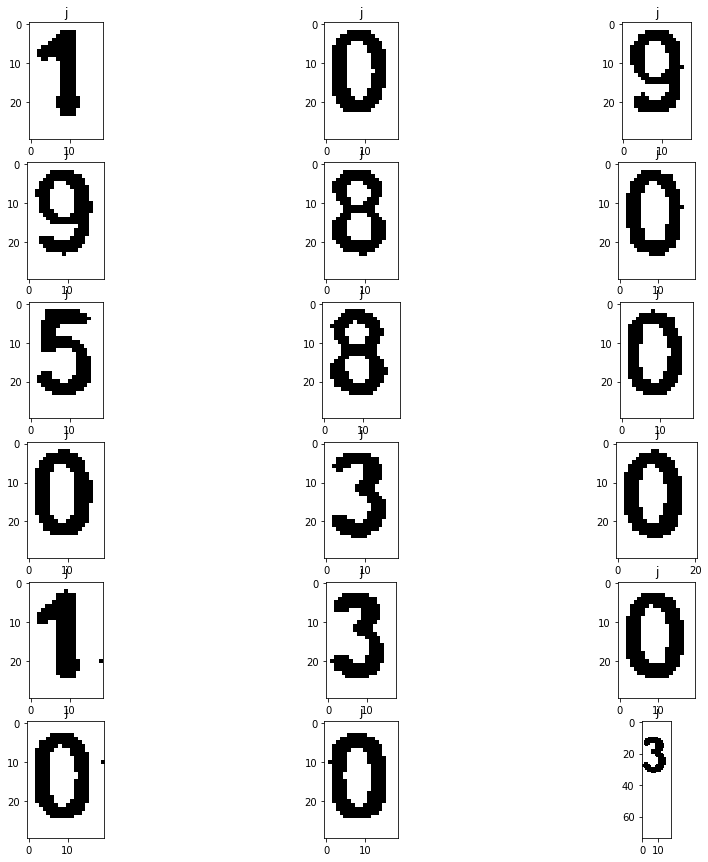

In [215]:
t = ['j','j','j','j','j','j','j','j','j','j','j','j','j','j','j','j','j','j']
MultiPlots(f2, 6, 3, 15, [], t, False )


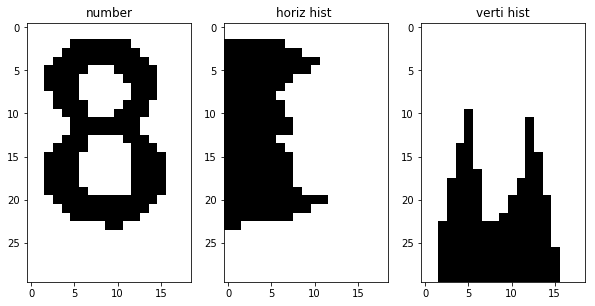

In [216]:
binary_img1 = f2[4].copy()

blpx_in_each_row1 = []
count_of_blpx(binary_img1, blpx_in_each_row1, False)
horiz_hist = np.zeros([np.asarray(binary_img1).shape[0],np.asarray(binary_img1).shape[1]]) 
Hist(horiz_hist, blpx_in_each_row1, False)


blpx_in_each_col = []
count_of_blpx(binary_img1 ,blpx_in_each_col, True)
vert_hist = np.zeros([np.asarray(binary_img1).shape[0],np.asarray(binary_img1).shape[1]])  #img_vertical_hist
Hist(vert_hist, blpx_in_each_col, True)

k = [binary_img1, horiz_hist, vert_hist]
t = ['number', 'horiz hist ', 'verti hist']
MultiPlots(k, 1, 3, 10, [] , t , False )

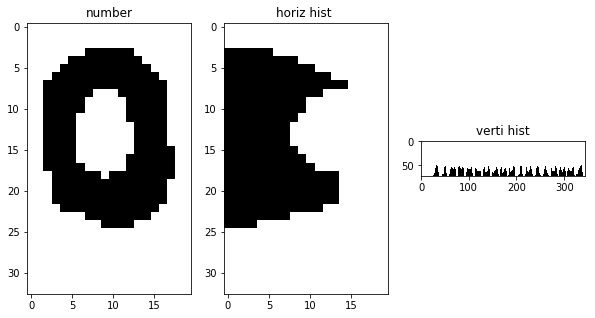

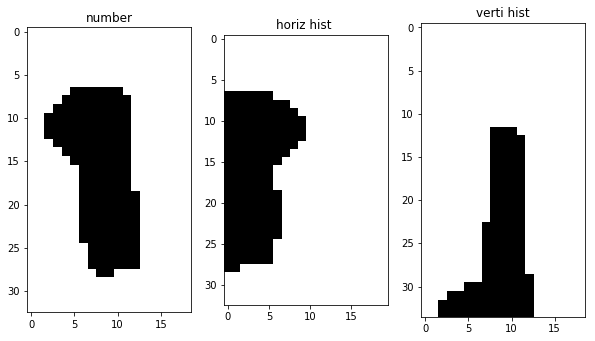

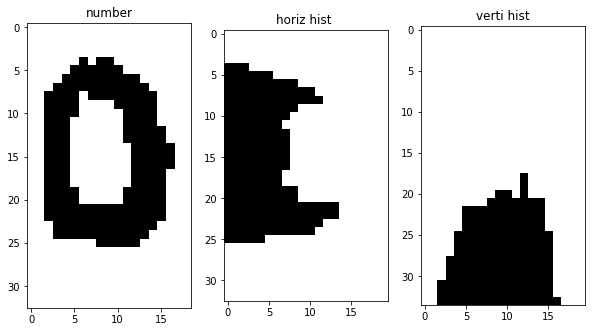

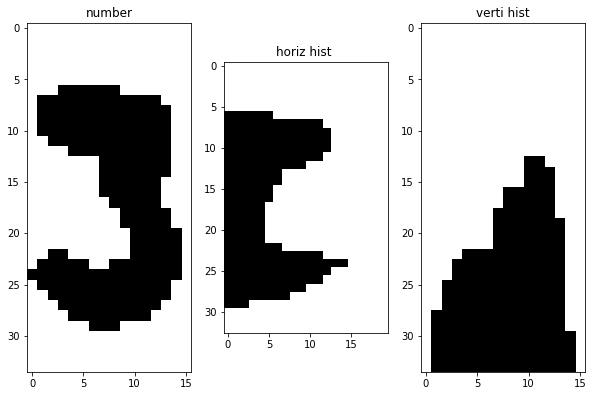

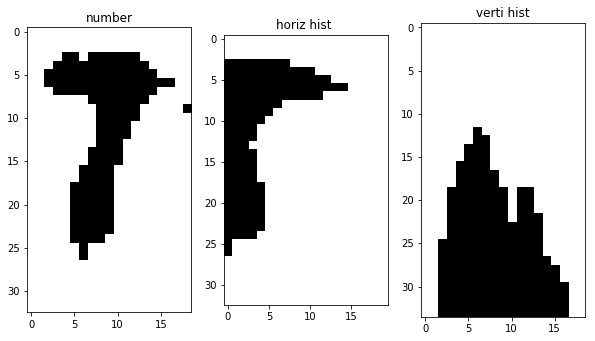

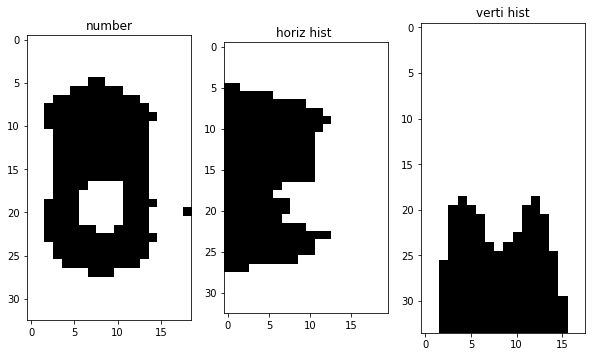

In [137]:
n = len(input_image)
blpx_in_each_row1 =  [[] for _ in range(n) ]
horiz_hist_of_last_char1 =  [np.zeros([np.asarray(zero).shape[0],np.asarray(zero).shape[1]]) for _ in range(n) ]
vert = [vert_hist, vert_hist1 , vert_hist2, vert_hist3, vert_hist4, vert_hist5, vert_hist6, vert_hist7, vert_hist9]

t = ['0', '1', '2', '3', '4', '5', '6', '8', '9']

for i in range(n):
    count_of_blpx(input_image[i], blpx_in_each_row1[i], False)
    Hist(horiz_hist_of_last_char1[i], blpx_in_each_row1[i], False)
k = [np.zeros([np.asarray(zero).shape[0],np.asarray(zero).shape[1]]) for _ in range(9)]


for i in range(n-4):
    k[i] = [input_image[i], horiz_hist_of_last_char1[i], vert[i]]
    t = ['number', 'horiz hist ', 'verti hist']
    MultiPlots(k[i], 1, 3, 10, [] , t , False )
    


In [ ]:
MultiPlots()

In [25]:
len(horiz_hist_of_last_char1)

9

In [26]:
n 

9

In [2]:
blpx_in_each_row1

NameError: name 'blpx_in_each_row1' is not defined